# Lab 3: ARMA Models

### Required packages

In [1]:
library(astsa)

The workhorse for ARIMA simulations is arima.sim(). Here are some examples:

#### AR(1)

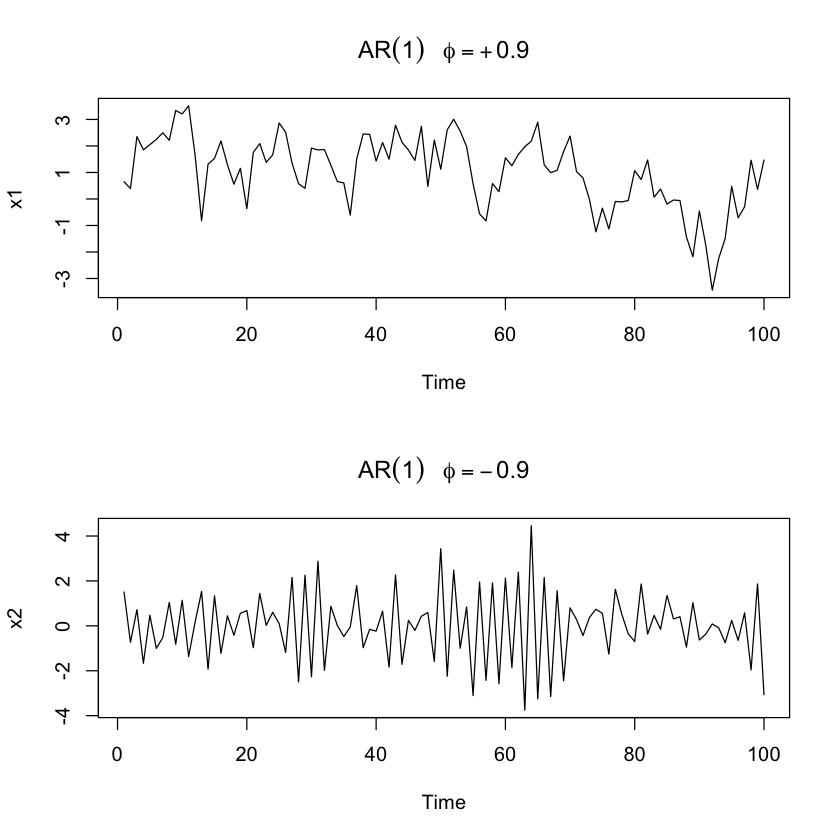

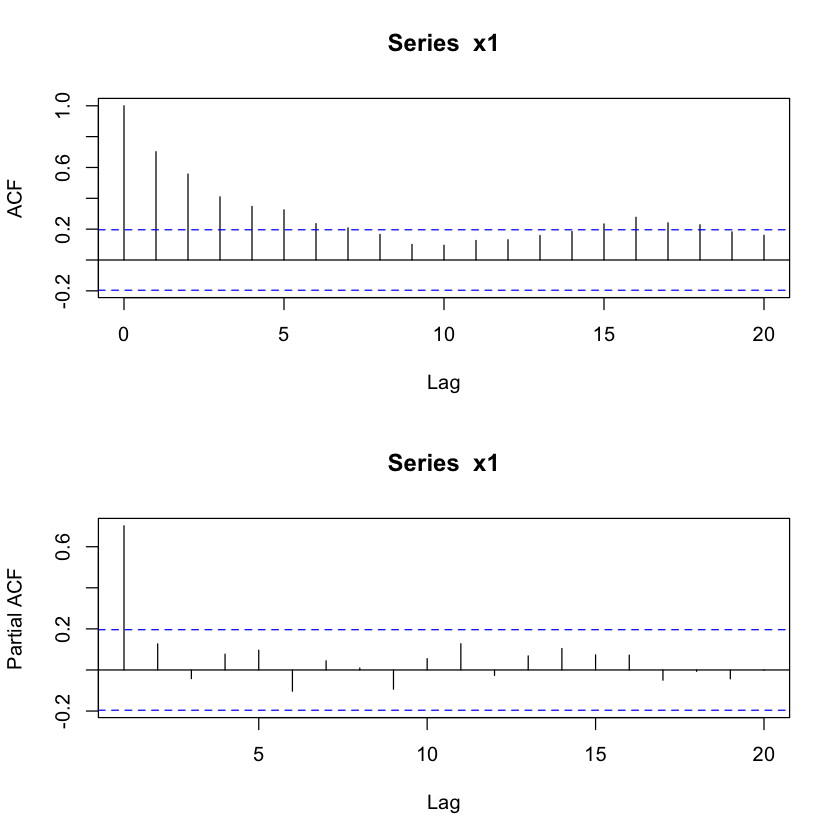

In [2]:
phi_1 <- 0.7
x <- arima.sim(model=list(ar=phi_1), 140)
# This is the explicit simulation:
gamma_0 <- 1/(1-phi_1^2)
x_0 <- rnorm(1)*sqrt(gamma_0)
x <- filter(rnorm(140), phi_1, method = "r", init = x_0)

# some AR1s
x1 = arima.sim(list(order=c(1,0,0), ar=.9), n=100) 
x2 = arima.sim(list(order=c(1,0,0), ar=-.9), n=100)
par(mfrow=c(2,1))
plot(x1, main=(expression(AR(1)~~~phi==+.9)))  # ~ is a space and == is equal  
plot(x2, main=(expression(AR(1)~~~phi==-.9)))
#dev.new()           # open another graphics device if you wish

acf(x1, 20)
pacf(x1, 20)


ACF,0.7,0.56,0.41,0.35,0.33,0.24,0.21,0.17,0.10,0.10,0.13,0.13,0.16,0.18,0.23,0.28,0.24,0.23,0.18,0.16
PACF,0.7,0.13,-0.04,0.08,0.10,-0.10,0.04,0.01,-0.09,0.06,0.13,-0.03,0.07,0.10,0.07,0.07,-0.05,-0.01,-0.04,0.00


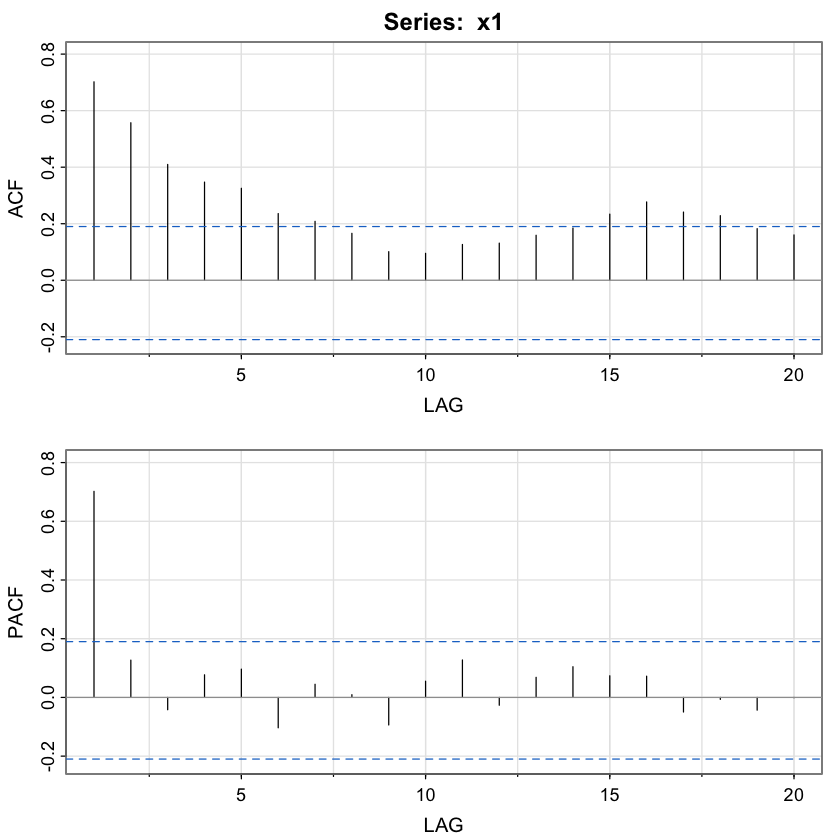

ACF,-0.81,0.66,-0.53,0.48,-0.42,0.29,-0.20,0.18,-0.22,0.26,-0.26,0.26,-0.23,0.21,-0.17,0.04,0.02,-0.15,0.21,-0.35
PACF,-0.81,0.03,0.04,0.18,0.06,-0.21,-0.04,0.13,-0.14,0.09,-0.01,0.01,0.10,-0.08,0.05,-0.26,-0.10,-0.23,0.08,-0.26


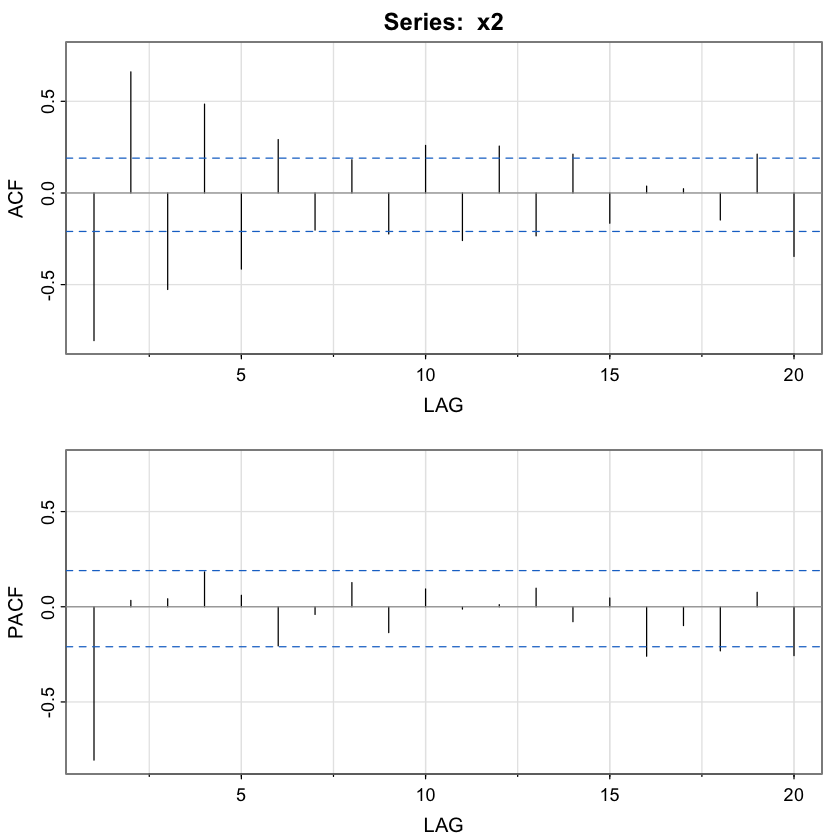

In [3]:
acf2(x1, 20)
#dev.new()           # and another
acf2(x2, 20)  # recall acf2 belongs to astsa...  

 ... if it's not loaded, then you would have to do something like:

`par(mfrow=c(2,1)); acf(x1); pacf(x1)`

#### AR(2)

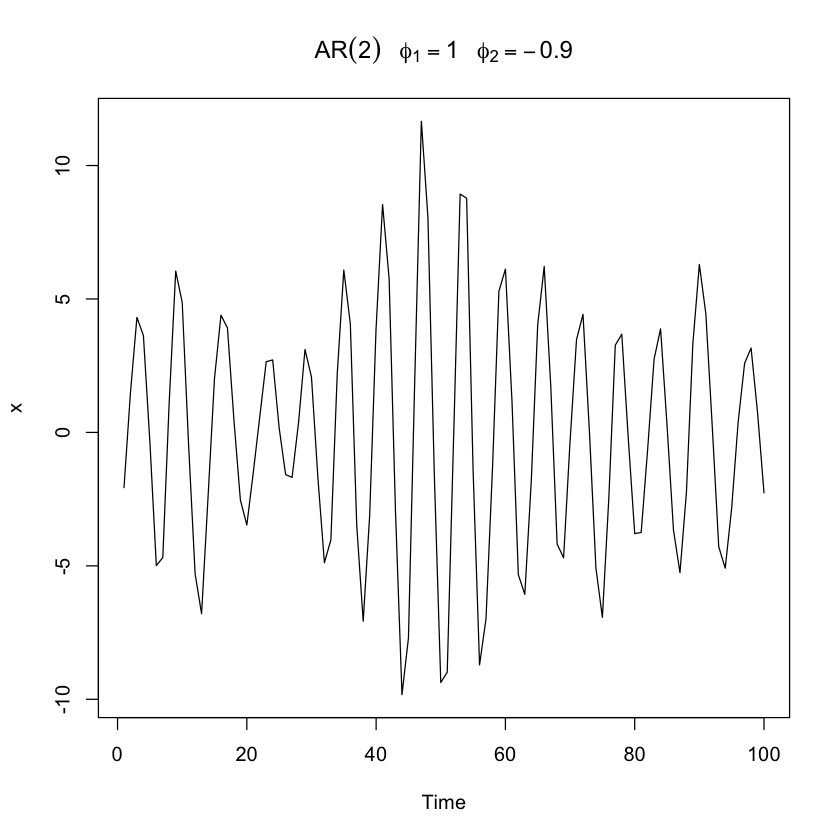

ACF,0.53,-0.41,-0.93,-0.58,0.29,0.85,0.58,-0.21,-0.75,-0.56,0.14,0.67,0.53,-0.11,-0.61,-0.52,0.06,0.56,0.51,-0.02
PACF,0.53,-0.96,-0.01,-0.04,-0.04,-0.17,-0.10,0.00,0.14,-0.04,0.02,0.01,-0.07,0.01,-0.08,-0.10,0.07,-0.05,0.02,0.02


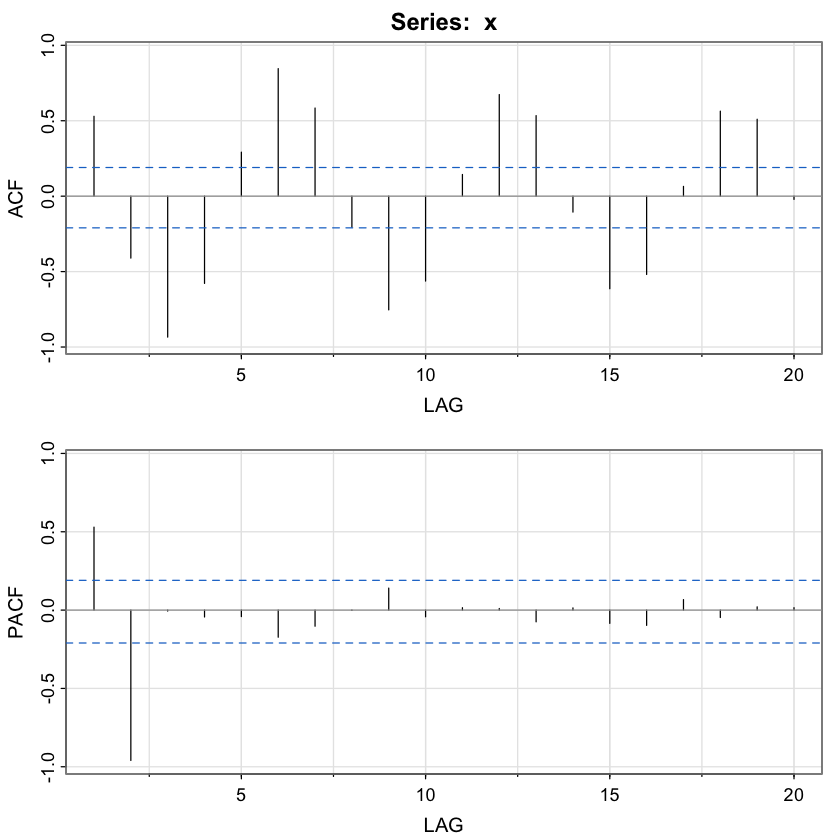

In [4]:
x = arima.sim(list(order=c(2,0,0), ar=c(1,-.9)), n=100) 
plot(x, main=(expression(AR(2)~~~phi[1]==1~~~phi[2]==-.9)))
#dev.new()
acf2(x)


#### MA(1)

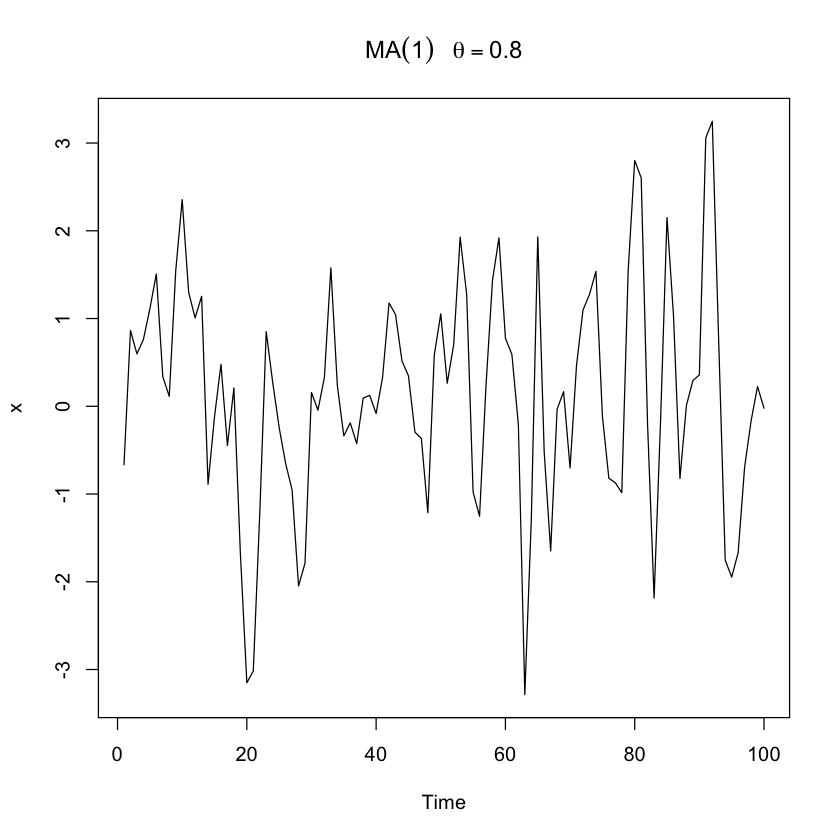

ACF,0.52,-0.05,-0.16,-0.15,-0.05,0.15,0.24,0.08,-0.11,-0.13,0.00,0.05,-0.09,-0.16,-0.13,-0.14,-0.16,-0.11,0.07,0.19
PACF,0.52,-0.44,0.18,-0.24,0.19,0.09,0.08,-0.12,-0.03,0.02,0.11,-0.12,-0.20,0.02,-0.09,-0.04,-0.19,-0.06,0.24,0.10


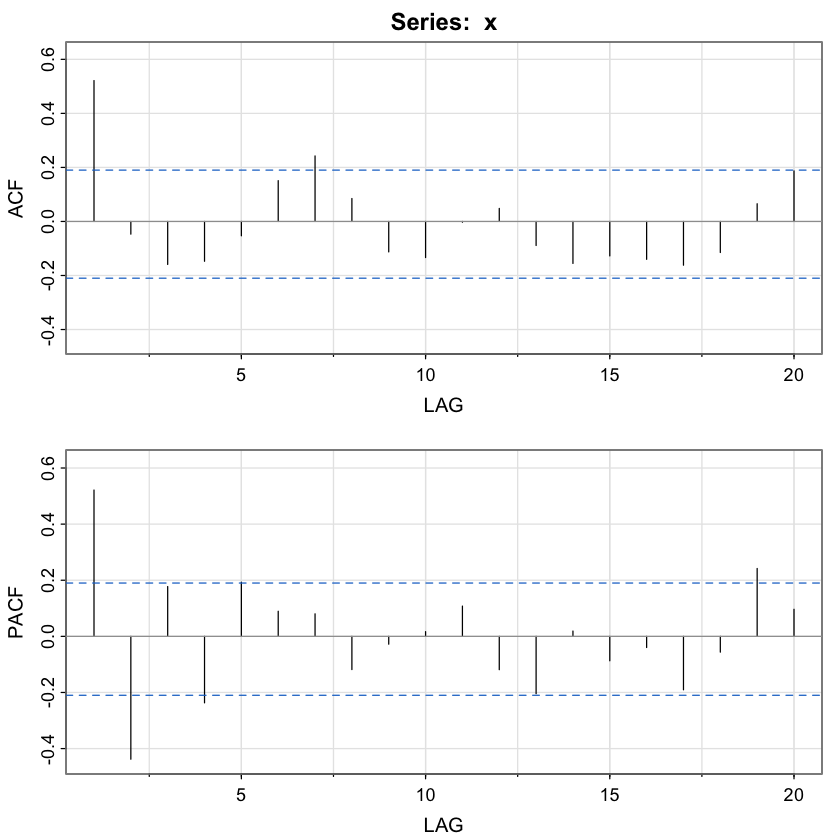

In [5]:
x = arima.sim(list(order=c(0,0,1), ma=.8), n=100)
plot(x, main=(expression(MA(1)~~~theta==.8)))
#dev.new()
acf2(x)


#### MA(6): This is a simulation of a specific MA(6) model

In [6]:
theta <- cos(2*pi*(1:6)/12)
y <- arima.sim(model=list(ma=theta), 133)
# This is the same as:
y <- filter(rnorm(140), c(1,theta), sides=1)[8:140]

ma_acf <- function(theta) {
  # Note that rho[1]=1 (zeroth lag)!
  q_1 <- length(theta)
  gamma <- convolve(c(1,theta), c(1,theta), type="o")
  rho <- gamma[(q_1+1):(2*q_1+1)]/gamma[q_1+1]
}


#### Simulation of ARMA(2,1) model with $\phi_1$ = 0.3, $\phi_2$ = −0.4, $\theta_1$= −0.8.

In [7]:
x <- arima.sim(list(ma = c(-0.8), ar=c(.3,-.4)),
               140, n.start = 1e5)
# This is the same as
q <- 2; n <- 140; n.start <- 1e5
z <- filter(rnorm(n.start+n), c(1, -0.8), sides=1)
z <- tail(z, n.start+n-q)
x <- tail(filter(z, c(.3,-.4), method="r"), n)

The latter may sometimes be necessary, because `arima.sim` checks the stability of the AR part by calculating the roots of $\phi (z)$ numerically, which is notoriously unstable if the order of $\phi$ is large. Sometimes `arima.sim` refuses to simulate a stable ARMA...

#### Simulate ARMA(1,1) ... generates a time series object

In [8]:

y <- arima.sim(n=100, model=list(ar=c(1,0.5), ma=c(0.5,0.2)), rand.gen=rnorm)

polyroot(c(1,-1,-0.5))   # one in, one out

polyroot(c(1,-1.5,0.75)) # complex pair, outside

y <- arima.sim(n=200, model=list(ar=c(1.5,-0.75), ma=c(0.5,0.2)), rand.gen=rnorm)
plot(y)


ERROR: Error in arima.sim(n = 100, model = list(ar = c(1, 0.5), ma = c(0.5, 0.2)), : 'ar' part of model is not stationary


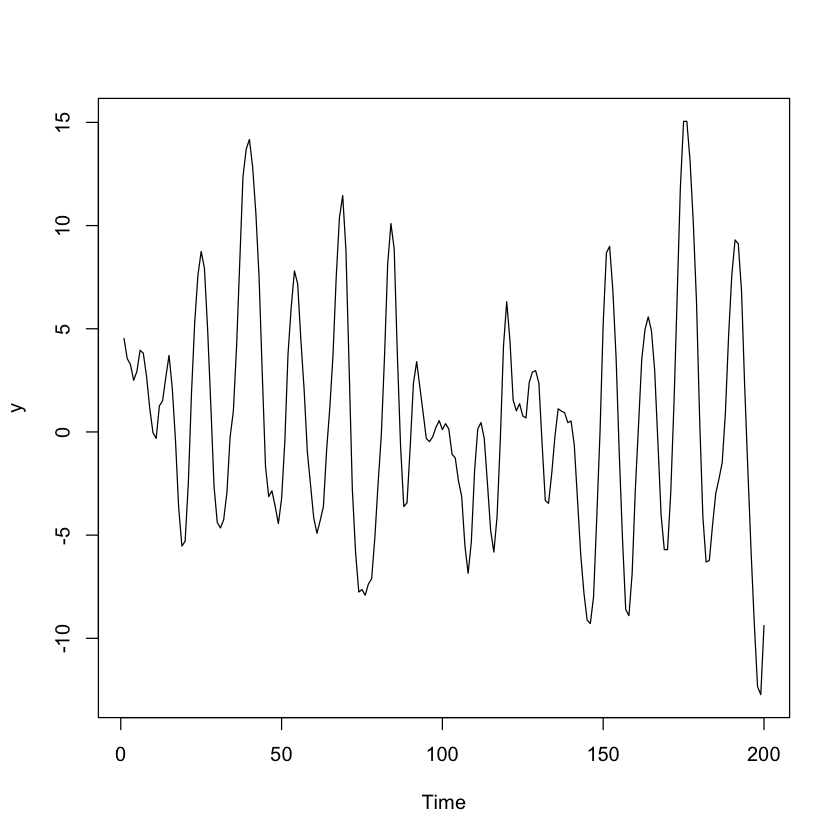

In [9]:
y <- arima.sim(n= 200, model=list(ar=c(1.6,-0.8), ma=c(0.5,0.2)), rand.gen=rnorm)
plot(y)


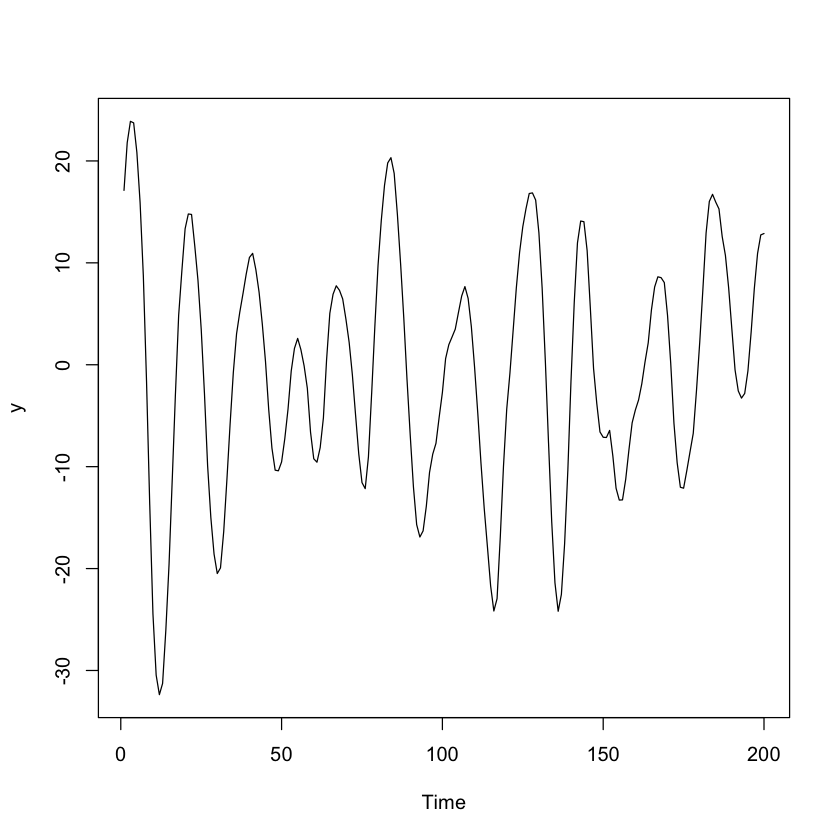

In [10]:
y <- arima.sim(n= 200, model=list(ar=c(1.8,-0.9), ma=c(0.5,0.2)), rand.gen=rnorm)
plot(y)


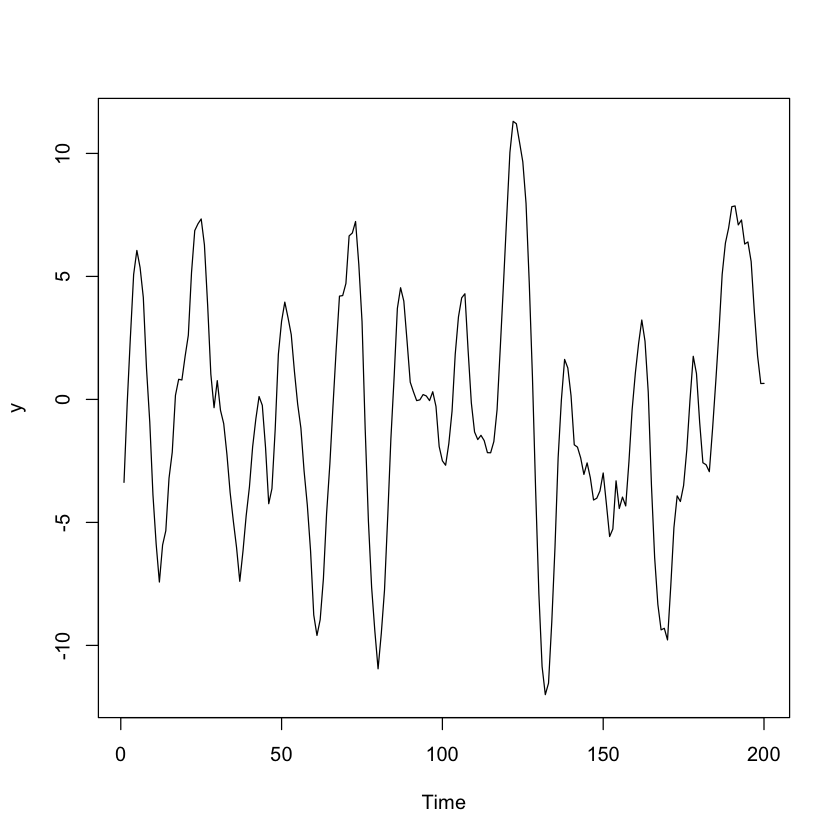

In [11]:
y <- arima.sim(n= 200, model=list(ar=c(1.8,-0.9)), rand.gen=rnorm)
plot(y)


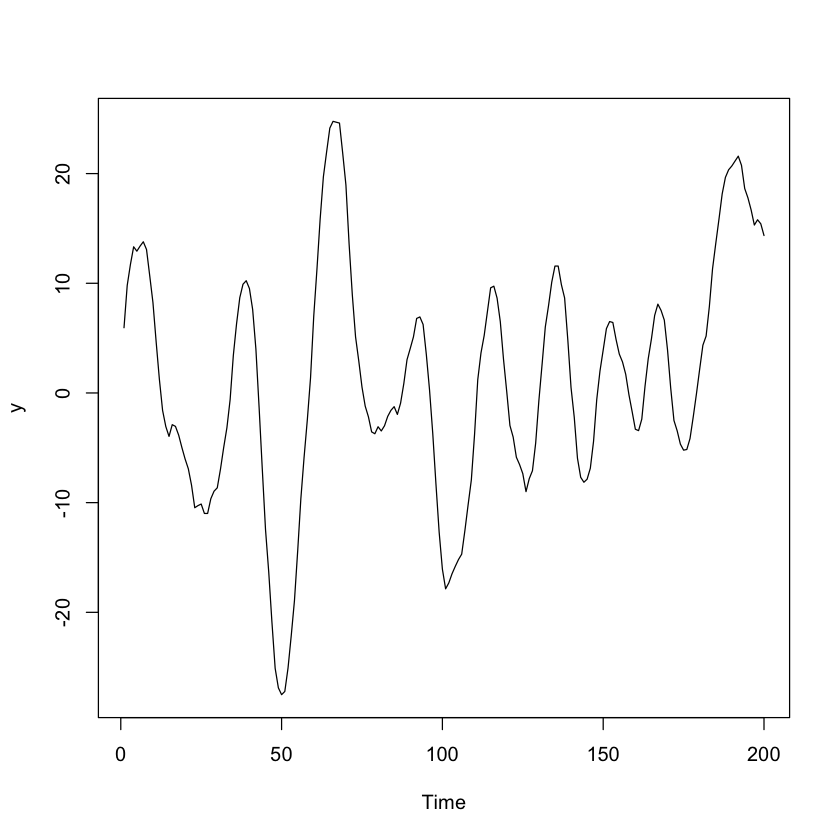

In [12]:
y <- arima.sim(n= 200, model=list(ar=c(1.9,-0.95)), rand.gen=rnorm)
plot(y)


#### ARIMA(1,1,1) 

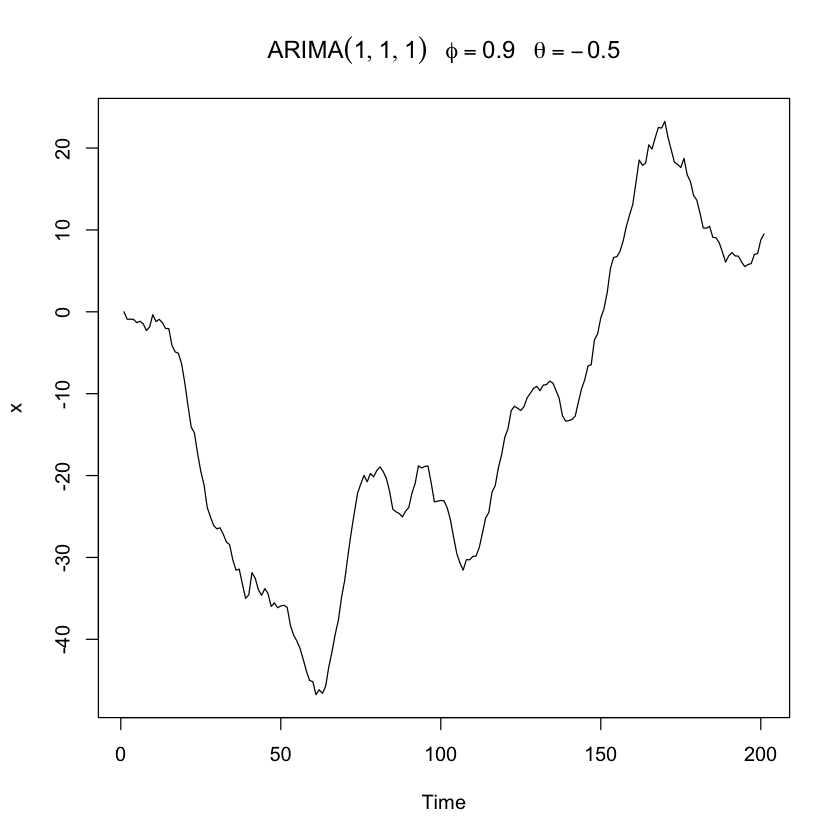

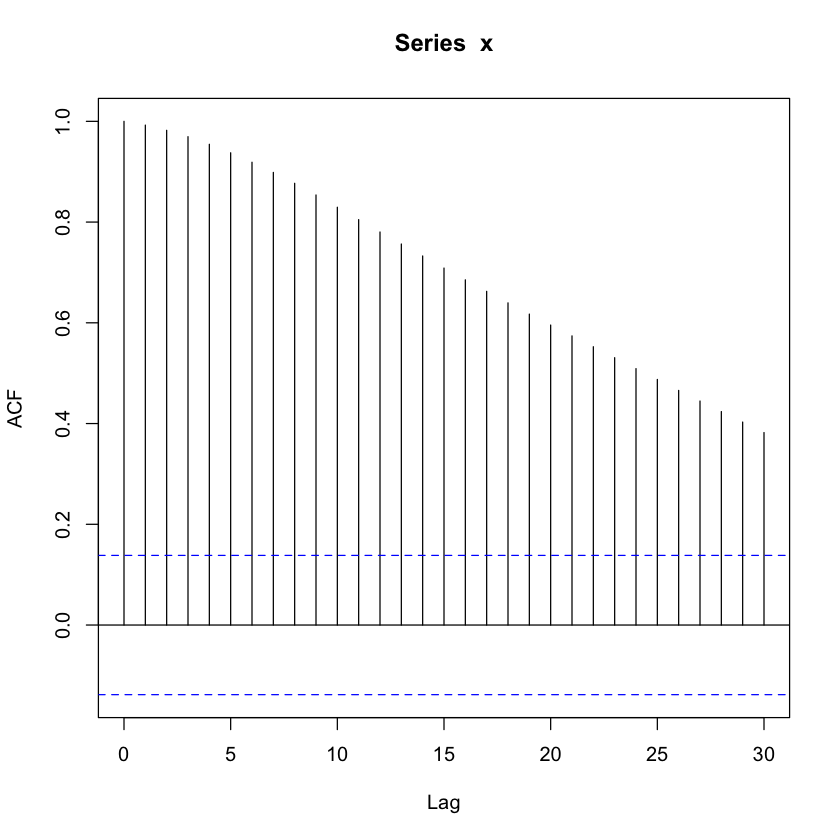

In [13]:
x = arima.sim(list(order=c(1,1,1), ar=.9, ma=-.5), n=200)
plot(x, main=(expression(ARIMA(1,1,1)~~~phi==.9~~~theta==-.5)))
#dev.new()         # the process is not stationary, so there is no population [P]ACF ...
acf(x, 30)   # but look at the sample values to see how they differ from the examples above

#### Estimating ARIMA model

In [14]:

x = arima.sim(list(order=c(1,0,1), ar=.9, ma=-.5), n=100) # simulate some data
(x.fit = arima(x, order = c(1, 0, 1)))   # fit the model and print the results
# Note that the reported intercept estimate is an estimate of the mean and not the constant. See notes.


Call:
arima(x = x, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.9219  -0.4208     0.5357
s.e.  0.0480   0.1081     0.6057

sigma^2 estimated as 0.7962:  log likelihood = -131.05,  aic = 270.1